# Barplot

## 1. Passos preliminares

### 1.1. Nosso primeiro gráfico!

Nesta aula, vamos criar nosso primeiro gráfico usando a função `sns.countplot()`. Trata-se de um gráfico de barras, criado por meio da contagem simples de uma variável categórica. Mas, antes de partirmos para a criação do gráfico propriamente dita, vamos precisar de algumas linhas de código para cumprir etapas preliminares.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cartoes = pd.read_csv("https://bit.ly/dados_cartoes")
cartoes.head(5)

,data_pgto,ano,mes,forma_pagamento,valor,tipo_despesa,nome_fornecedor,cpf_servidor,mandato,posicao_mandato
0,2003-01-02,2003,1,Débito,1696.90,LOCACAO DE MEIOS DE TRANSPORTE,JW TRANSPORTADORA TURÍSTICA,***.010.008-**,Lula (1º Mandato),1
1,2003-01-02,2003,1,Débito,1336.60,LOCACAO DE MEIOS DE TRANSPORTE,JW TRANSPORTADORA TURÍSTICA,***.010.008-**,Lula (1º Mandato),1
2,2003-01-02,2003,1,Débito,1396.43,LOCACAO DE MEIOS DE TRANSPORTE,JW TRANSPORTADORA TURÍSTICA,***.868.251-**,Lula (1º Mandato),1
3,2003-01-03,2003,1,Débito,105.00,MATERIAL P/MANUTENÇÃO DE BENS MÓVEIS,SEBASTIO ALVES DE SOUSA - ME,***.262.328-**,Lula (1º Mandato),1
4,2003-01-03,2003,1,Débito,200.00,MATERIAL P/MANUTENÇÃO DE BENS MÓVEIS,JOÃO LEITE NETO - ME - JLN ELETRONICOS,***.262.328-**,Lula (1º Mandato),1


# Gráficos de barra realizando agregação

Como a biblioteca `seaborn` tem o objetivo de simplificar nossa tarefa de criação de gráficos, ela já possui funções que realizam a agregação de dados automaticamente. Isso significa que, ainda que passemos dados em que a unidade de análise não é a mesma que a desejada para o gráfico (categoria sendo representada), a função `barplot()` já realiza essa tarefa automaticamente.

No entanto, é importante termos consciência de como essa função funciona, qual seu valor padrão e como podemos alterá-lo. Para isso, vamos criar um gráfico de barras simples, passando nosso conjunto de dados

<Axes: xlabel='mandato', ylabel='valor'>

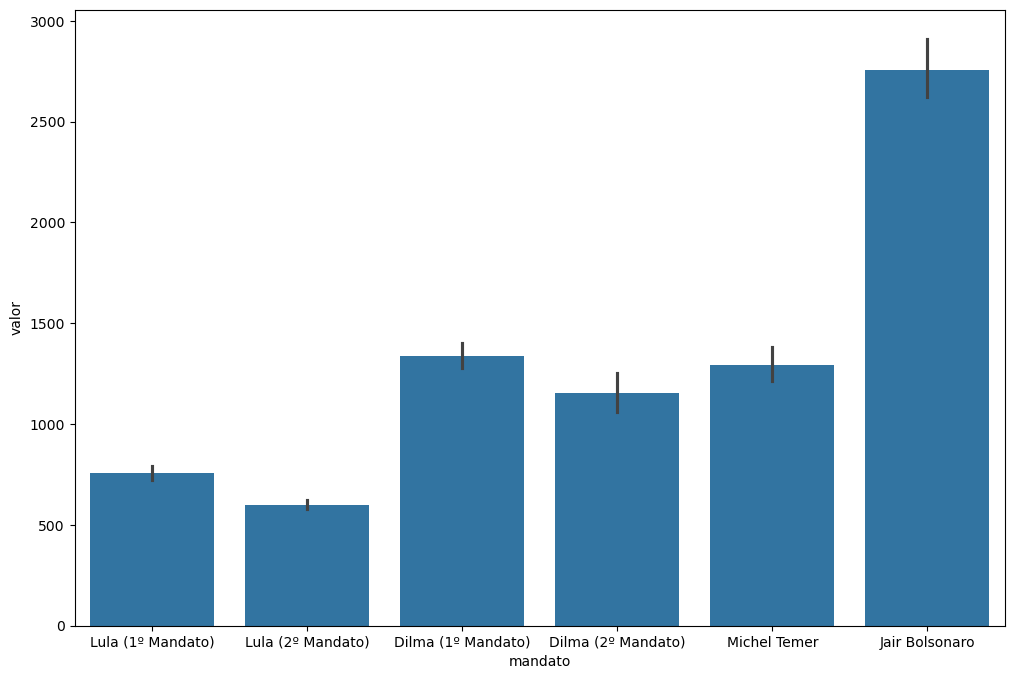

In [6]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(
    x="mandato",
    y="valor",
    data=cartoes,
    ax=ax,
)

O que está acontecendo com esse gráfico? Por que há uma linha no meio das barras criadas?

Como cada categoria de `"mandato"` aparece em múltiplas linhas, a função `barplot()` está realizando a média dos valores de `"idade"` para cada categoria. Isso é o valor padrão da função  [podemos conferir essas informações na documentação da função: https://seaborn.pydata.org/generated/seaborn.barplot.html](https://seaborn.pydata.org/generated/seaborn.barplot.html)

Estamos preocupados com os argumentos `estimator` e `errorbar`.

O primeiro é a função que será aplicada aos dados para realizar a agregação. Seu valor padrão `"mean"` indica que a média será calculada. 

O segundo é um argumento booleano que indica se queremos ou não e como adicionar barras de erro ao gráfico. O valor padrão indica que um intervalo de confiança de 95% é calculado. 

Não precisamos nos preocupar com o significado exato desse intervalo, mas é importante saber é uma medida do erro do valor médio considerando que está sendo feita uma estimativa. Isso não se aplica ao nosso caso porque temos o valor de todas as transações, não uma amostra.

Vamos remover isso.


<Axes: xlabel='mandato', ylabel='valor'>

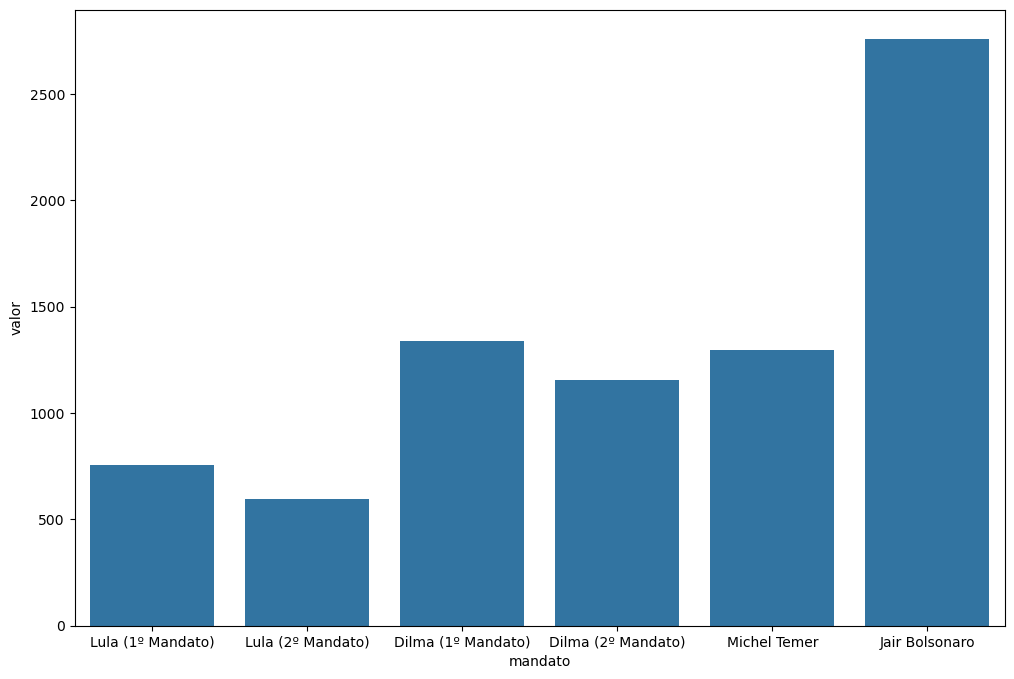

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(
    x="mandato",
    y="valor",
    errorbar=None,
    data=cartoes,
    ax=ax,
)

Podemos calcular o valor médio para cada categoria introduzindo novamente o argumento `hue`

<Axes: xlabel='mandato', ylabel='valor'>

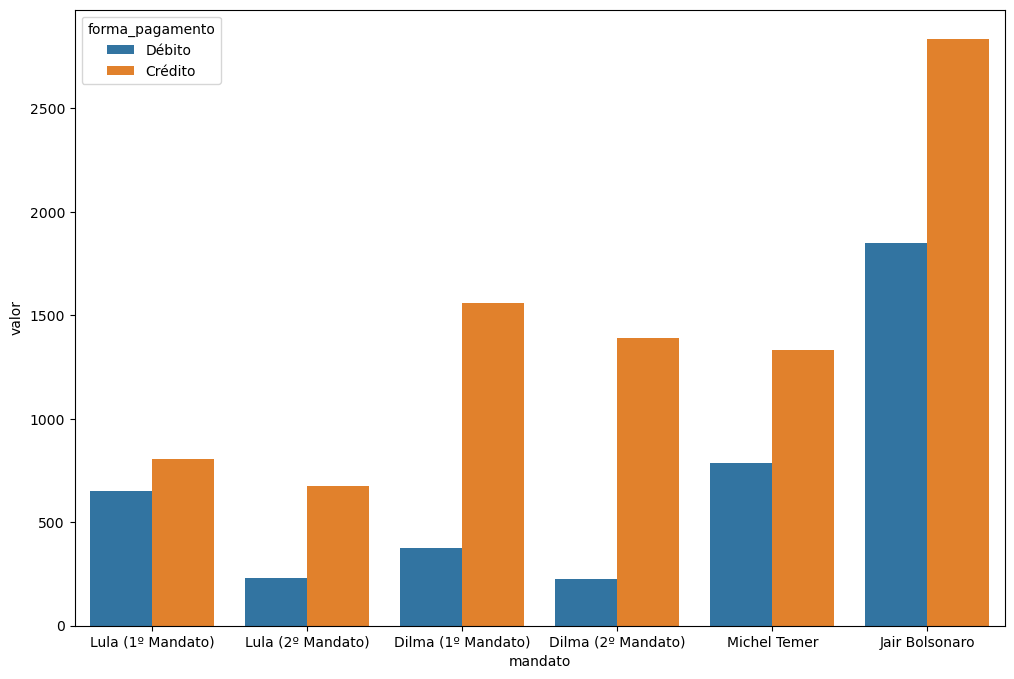

In [10]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(
    x="mandato",
    y="valor",
    hue="forma_pagamento",
    errorbar=None,
    data=cartoes,
    ax=ax,
)

Agora, em vez de calcular o valor médio vamos calcular o gasto total feito em cada mandato. Para isso, vamos mudar a função de agregação. Se por padrão o `estimator="mean"` (média) queremos que seja `estimator="sum"` (soma).

<Axes: xlabel='mandato', ylabel='valor'>

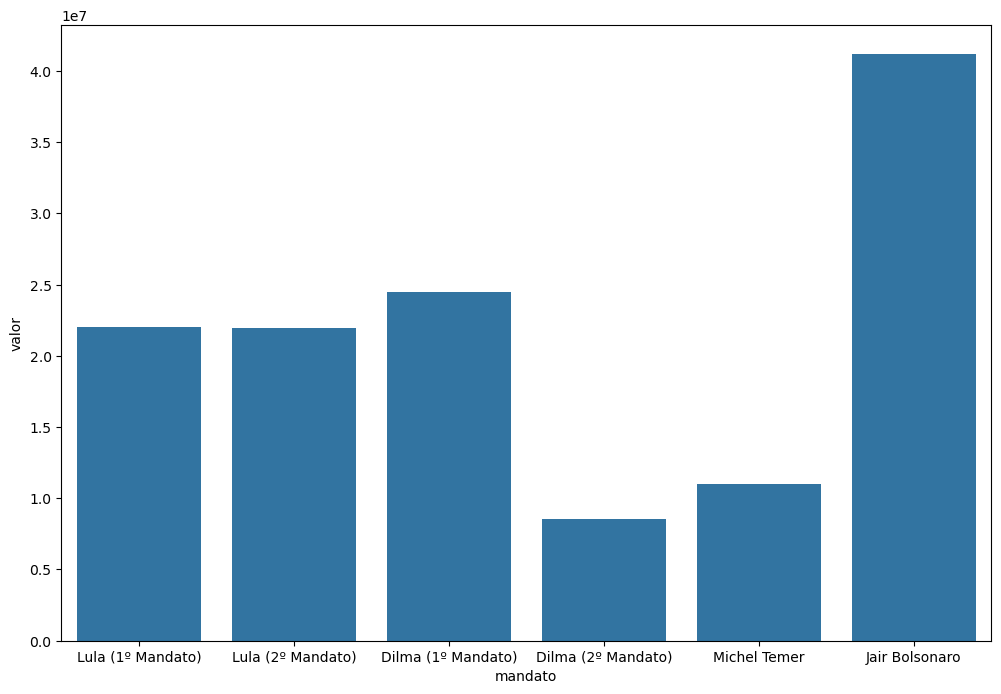

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(
    x="mandato",
    y="valor",
    estimator="sum",
    errorbar=None,
    data=cartoes,
    ax=ax,
)

Um elemento importante a se notar é que há uma informação importante no eixo Y. A indicação "1e7" significa que o eixo Y está em notação científica. Isso acontece porque os valores são muito grandes.

Em nosso caso específico, isso significa que o valor do eixo Y significa dezenas de milhões de reais (10^7).

Vamos repetir o gráfico novamente distinguindo a forma de pagamento

Podemos mudar isso com o método `plt.ticklabel_format(style='plain', axis='y')`.

<Axes: xlabel='mandato', ylabel='valor'>

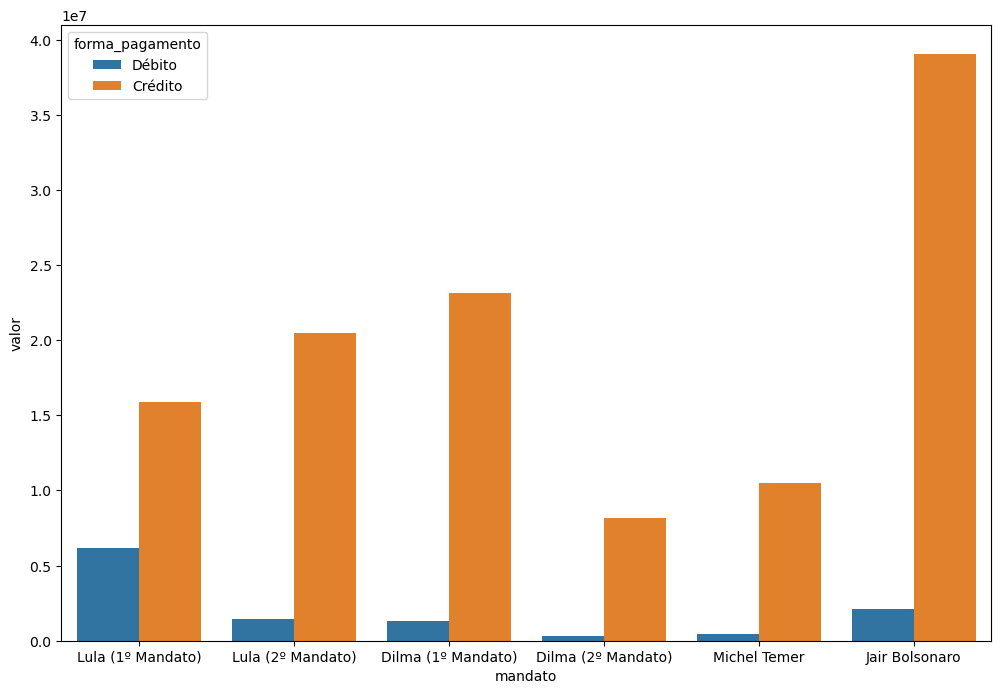

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(
    x="mandato",
    y="valor",
    hue="forma_pagamento",
    estimator="sum",
    errorbar=None,
    data=cartoes,
    ax=ax,
)

Apesar de o ano ser uma variável numérica, podemos pensar nele como uma categoria. Com isso, tratamos cada ano como um conjunto totalmente diferente, e calculamos os gastos em cada um dele.

<Axes: xlabel='ano', ylabel='valor'>

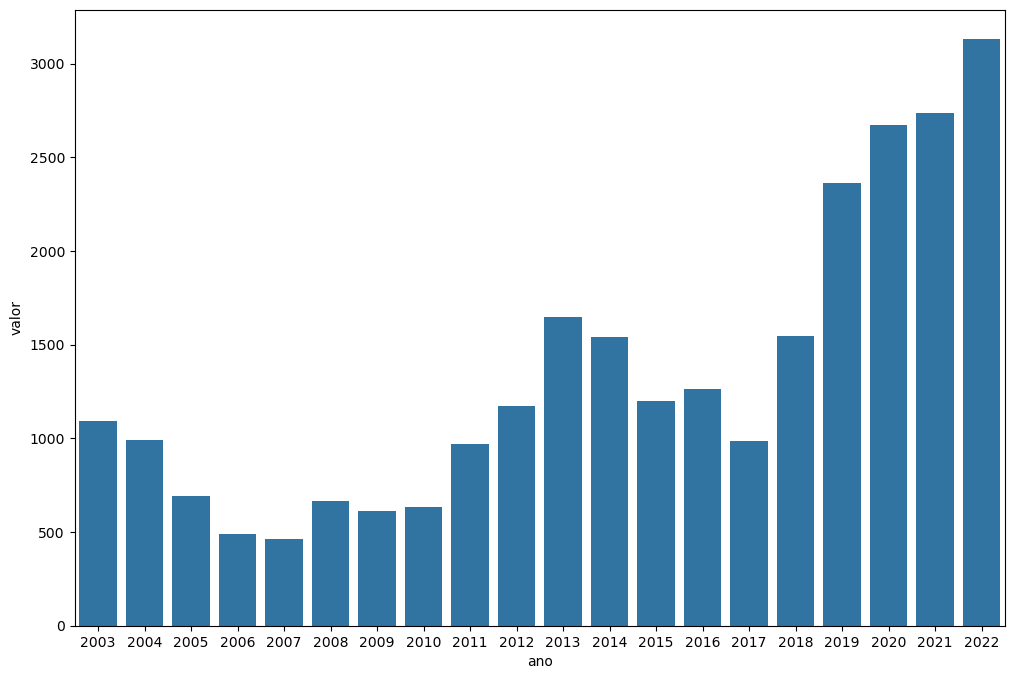

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(
    x="ano",
    y="valor",
    errorbar=None,
    data=cartoes,
    ax=ax,
)

In [ ]:
sns.countplot(
    y="mandato",
    hue="forma_pagamento",
    data=cartoes
)

In [ ]:
sns.countplot(y="mandato", x="valor", data=cartoes)

In [ ]:
fig, ax = plt.subplots()

sns.countplot(
    y="mandato",
    hue="forma_pagamento",
    palette={"Crédito": "#1e4ce3",
             "Débito": "#1fdb51"},
    data=cartoes,
    ax=ax
)

ax.set_title("Volume de transações dos cartões presidenciais\n(por mandato e forma de pagamento)")
ax.set_xlabel("Número de Transações")
ax.set_ylabel("")
ax.legend(title="Forma de Pagamento")
plt.show()
